CSV Data Source: http://introcs.cs.princeton.edu/java/data/
- surnames.csv
- 151,671 surnames by race/ethnicity
    - modified file to only include top 1000 to reduce file size
- data taken from 2000 US Census

**NOTE:** I like to take thorough notes on my readings, but this page is not done. I have, however, experimented with my `surnames` CSV file in addition to taking notes.

# TOC
[DataCamp](#DataCamp)<br>
[Chapter 3: Data Manipulation with Pandas](#Chapter-3:-Data-Manipulation-with-Pandas)
- [Installing and Using Pandas](#Installing-and-Using-Pandas)
- [Introducing Pandas Objects](#Introducing-Pandas-Objects)
  - [The Pandas Series Object](#The-Pandas-Series-Object)
    - [Series as a Generalized NumPy Array](#Series-as-a-Generalized-NumPy-Array)
    - [Series as a Specialized Dictionary](#Series-as-a-Specialized-Dictionary)
    - [Constructing Series Objects](#Constructing-Series-Objects)
  - [The Pandas DataFrame Object](#The-Pandas-DataFrame-Object)
    - [DataFrame as a Generalized NumPy Array](#DataFrame-as-a-Generalized-NumPy-Array)
    - [DataFrame as a Specialized Dictionary](#DataFrame-as-a-Specialized-Dictionary)
    - [Constructing DataFrame Objects](#Constructing-DataFrame-Objects)
      - [From a Single Series Object](#From-a-Single-Series-Object)
      - [From a List of Dicts](#From-a-List-of-Dicts)
      - [From a Dictionary of Series Objects](#From-a-Dictionary-of-Series-Objects)
      - [From a Two-Dimensional NumPy Array](#From-a-Two-Dimensional-NumPyArray)
      - [From a NumPy Structured Array](#From-a-NumPy-Structured-Array)

[Work with CSV File](#Work-with-CSV-File)

---
# DataCamp
- slides from tutorial downloaded & notes taken on them

# Chapter 3: Data Manipulation with Pandas
- Pandas is built on top of NumPy w/efficient implementation of `DataFrame`
- `DataFrame`s are essentially multidimensional arrays w/attached row & column types
    - often w/mixed data types and/or missing data

## Installing and Using Pandas
- [Pandas Documentation](http://pandas.pydata.org)

In [1]:
import pandas as pd     # import Pandas
import numpy as np     # import NumPy
import matplotlib.pyplot as pyplot     # import pyplot (for working with my CSV)
pd.__version__     # check version of Pandas
# pd?     # built-in Pandas documentation

'0.20.1'

## Introducing Pandas Objects
- 3 fundamental Pandas data structures: `Series`, `DataFrame`, `Index`

### The Pandas Series Object
- a `Series` is a 1D array of indexed data
- can be created from list or array w/`pd.Series()`
    - values can be accessed with `.values`
        - familiar NumPy array
    - indices can be access with `.index`
        - array-like object of type `pd.Index`
- data can be accessed by associated index via square brackets

In [2]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])     # Series from list
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [3]:
data.values     # access values

array([ 0.25,  0.5 ,  0.75,  1.  ])

In [4]:
data.index     # access index

RangeIndex(start=0, stop=4, step=1)

In [5]:
data[0]     # access specific data element

0.25

In [6]:
data[1:4]     # access specific data slice

1    0.50
2    0.75
3    1.00
dtype: float64

#### Series as a Generalized NumPy Array
- NumPy array has implicitly defined index to access values, but Pandas Series has explicitly defined index associated w/values
- in Series, index doesn't have to be continuous int
  - can be any desired type
  - can be nonsequential

In [7]:
pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
# non-int index

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [8]:
pd.Series([0.25, 0.5, 0.75, 1.0], index=[2, 5, 3, 7])
# nonsequential index

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

#### Series as a Specialized Dictionary
- Series maps typed keys to set of typed values (being type-specific makes it more efficient)
- by default Series will be created where index is drawn from sorted keys
- typical dictionary-style access can be performed
- Series supports array-style slicing

In [9]:
population_dict = {'California': 38332521,
                           'Texas': 26448193,
                           'New York': 19651127,
                           'Florida': 19552860,
                           'Illinois': 12882135}
population = pd.Series(population_dict)     # Series from dict
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [10]:
population['California']     # dictionary-style access

38332521

In [11]:
population['California':'Illinois']     # array-style slicing

California    38332521
Florida       19552860
Illinois      12882135
dtype: int64

#### Constructing Series Objects
- when starting from scratch, constructing a Series is always some form of `pd.Series(data, index=index)`
  - index is an optional argument
  - data can be one of many entities
- when data is a list or NumPy array, index defaults to int sequence
- when data is a scalar, its repeated to fill specified index
- when data is a dictionary, index defaults to sorted dictionary keys
- in every case, index can be explicitly set if different result is preferred
  - if data is dictionary, Series will only be populated w/explicitly identified keys

In [12]:
# for list & default int index, see first example of series object above
pd.Series(5, index=[100,200,300])     # scalar data, specified index

100    5
200    5
300    5
dtype: int64

In [13]:
pd.Series({2:'a', 1:'b', 3:'c'})     # dictionary data/index

1    b
2    a
3    c
dtype: object

In [14]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])     # dictionary data/index w/specified index

3    c
2    a
dtype: object

### The Pandas DataFrame Object
- `DataFrame` can also be thought of as a generalized NumPy array or specialized Python dictionary

#### DataFrame as a Generalized NumPy Array
- DataFrame is analog of 2D array w/both flexible row indices & flexible column names
- `.index` attribute that gives access to index labels
- `.columns` attribute returns an Index object holding column labels

In [15]:
# construct DataFrame using population from above & area from next line
area = pd.Series({'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995})
states = pd.DataFrame({'population': population, 'area': area})
states

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [16]:
states.index     # access index labels

Index(['California', 'Florida', 'Illinois', 'New York', 'Texas'], dtype='object')

In [17]:
states.columns     # access column labels

Index(['area', 'population'], dtype='object')

In [18]:
states['area']

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

#### DataFrame as a Specialized Dictionary
- where dictionary maps key to value, DataFrame maps column name to a Series of column data
- `data[0]` will return first row of data in DataFrame
- `data[col0]` will return the first column of data in DataFrame

#### Constructing DataFrame Objects
##### From a Single Series Object
- DataFrame is collection of Series object & a single-column DataFrame can be constructed from single Series

In [19]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Florida,19552860
Illinois,12882135
New York,19651127
Texas,26448193


##### From a List of Dicts
- any list of dictionaries can be made into DataFrame
- even if some keys in dict are missing, Pandas will fill them in w/`NaN` values
  - `NaN` = not a number

In [20]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]     # list of dictionaries made from list comprehension
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [21]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])
# DataFrame from dictionary where there's missing keys

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


##### From a Dictionary of Series Objects
- DataFrame can be made from dictionary of Series objects too

In [22]:
pd.DataFrame({'population':population, 'area':area})

,area,population
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


##### From a Two-Dimensional NumPy Array
- given 2D array of data, we can create DataFrame w/any specified column & index names
- if omitted, int index will be used for each

In [23]:
pd.DataFrame(np.random.rand(3,2), columns=['foo','bar'], index=['a','b','c'])

,foo,bar
a,0.183156,0.843782
b,0.653484,0.745855
c,0.718040,0.265035


##### From a NumPy Structured Array
- DataFrame operates like a structure array & can be created from one

In [24]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0,  0.), (0,  0.), (0,  0.)], 
      dtype=[('A', '<i8'), ('B', '<f8')])

In [25]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### The Pandas Index Object
- both Series & DataFrame have an explicit index that lets you reference & modify data
- `Index` object can be thought of either as an immutable array or as an ordered set
    - technically a multiset since they may contain repeated values
- construct an Index object from a list of ints using `pd.Index()`

#### Index as Immutable Array
- can use standara Python indexing notation to retrieve values/slices
- Index object have many attributes familiar of NumPy arrays
- indices are immutable & can't be modified by normal means
    - ex: if you try to do `ind[1] = 0` you'll get an error
    - makes it safer to share indices between multiple DataFrames & arrays w/o potential for side effects from accidental index modification

In [26]:
ind = pd.Index([2,3,5,7,11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

In [27]:
ind[1]

3

In [28]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [29]:
print(ind.size,
     ind.shape,
     ind.ndim,
     ind.dtype)

5 (5,) 1 int64


#### Index as Ordered Set
- Pandas objects are designed to facilitate operations across datasets
    - a lot of this depends on math
- Index object follows a lot of conventions used by Python's `set` structure so unions, intersections, differences & other combos can be computed easily
    - all examples below can also be accessed via object methods

In [30]:
ind2 = pd.Index([1,3,5,7,9])

ind & ind2     # intersection
ind.intersection(ind2)     # intersection using object method

Int64Index([3, 5, 7], dtype='int64')

In [31]:
ind | ind2     # union

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [32]:
ind ^ ind2     # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

## Data Indexing and Selection
### Data Selection in Series
#### Series as Dictionary
- Series provides mapping from collection of keys to a collection of values
- can use dictionary-like Python expressions & methods to examine keys/indices & values
- can be modified w/dictionary-like syntax

In [33]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a','b','c','d'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [34]:
data['b']     # accessing value by key

0.5

In [35]:
'a' in data

True

In [36]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [37]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [38]:
data['e'] = 1.25    # add new key/value pair
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

#### Series as One-Dimensional Array
- provides array-style item selection via same basic mechanisms as NumPy arrays: slices, masking, fancy indexing
- when slicing w/expliciting index, final index is _included_ in the slice
- when slicing w/implicit index, final index is _excluded_ from slice

In [39]:
data['a':'c']     # slicing by explicit index

a    0.25
b    0.50
c    0.75
dtype: float64

In [40]:
data[0:2]     # slicing by implicit integer index

a    0.25
b    0.50
dtype: float64

In [41]:
data[(data>0.3) & (data<0.8)]     # masking

b    0.50
c    0.75
dtype: float64

In [42]:
data[['a','e']]     # fancy indexing

a    0.25
e    1.25
dtype: float64

#### Indexers: loc, ilox, and ix
- Panadas has special _indexer_ attributes to avoid confusion in the case of integer indexes
    - to avoid the whole explicit/implicit selection and slicing thing shown above
- `loc` allows indexing & slicing that always references the explicit index
- `iloc` allows indexing & slicing that always references the implicit (Python-style) index
- `ix` is a hybrid of `loc` & `iloc`
    - for Series objects it's equivalent to standard []-based indexing

In [43]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])     # redefine data to have int index
data

1    a
3    b
5    c
dtype: object

In [44]:
data.loc[1]     # indexing using explicit index

'a'

In [45]:
data.iloc[1]     # indexing using implicit index

'b'

In [46]:
data.loc[1:3]     # slicing using explicit index

1    a
3    b
dtype: object

In [47]:
data.iloc[1:3]     # slicing using implicit index

3    b
5    c
dtype: object

### Data Selection in DataFrame
#### DataFrame as a Dictionary
- the individual Series that make up the columns of a DataFrame can be access via dictionary-style indexing of column name
- can use attribute-style access w/column names that are strings
    - that's b/c it accesses the exact same object as the dictionary style access
- this won't work in all cases
    - won't work if column names aren't strings
    - won't work if column names conflict w/DataFrame methods
- avoid column assignment via attribute
    - use `data['pop'] = z` instead of `data.pop = z`
- dictionary-style syntax can be used to modify or add to the object

In [48]:
area = pd.Series({'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127, 'Florida': 19552860, 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135
New York,141297,19651127
Texas,695662,26448193


In [49]:
data['area']     # dictionary-style indexing

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [50]:
data.area     # attribute-style access

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [51]:
data.area is data['area']     # dictionary-style & attribute-style are accessing same thing

True

In [52]:
data.pop is data['pop']
# not the same b/c pop is a built-in DataFrame method

False

In [53]:
data['density'] = data['pop'] / data['area']     # new column via dictionary-style syntax
data

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


#### DataFrame as Two-Dimensional Array
- can examine raw data array using `.values` attribute
- can transpose the full DataFrame to swap rows & columns using `.T`
- passing single index to an array accesses a row
- passing single "index" to DataFrame accesses a column
- using `iloc`, can index underlying array as if it's a NumPy array (using implicit Python-style index) but DataFrame index & column labels are kept in result
    - same w/`loc` except you have to provide the index & column names
- `ix` is hybrid of `iloc` and `loc`
    - remember that for int indices that it's subject to same explicit/implicit confusing as int-indexed Series objects
- any NumPy-style data access-patterns can be used w/in these indexers
    - ex: w/in loc you can combine masking & fancy indexing
- any of the above indexing conventions can be used to set or modify values

In [54]:
# use same data DataFrame from above
data.values     # examine raw data

array([[  4.23967000e+05,   3.83325210e+07,   9.04139261e+01],
       [  1.70312000e+05,   1.95528600e+07,   1.14806121e+02],
       [  1.49995000e+05,   1.28821350e+07,   8.58837628e+01],
       [  1.41297000e+05,   1.96511270e+07,   1.39076746e+02],
       [  6.95662000e+05,   2.64481930e+07,   3.80187404e+01]])

In [55]:
data.T     # transpose the DataFrame

,California,Florida,Illinois,New York,Texas
area,4.239670e+05,1.703120e+05,1.499950e+05,1.412970e+05,6.956620e+05
pop,3.833252e+07,1.955286e+07,1.288214e+07,1.965113e+07,2.644819e+07
density,9.041393e+01,1.148061e+02,8.588376e+01,1.390767e+02,3.801874e+01


In [56]:
data.values[0]     # passing single index to array accesses a row
# have to use .values or it gives an error (since trying to index array)

array([  4.23967000e+05,   3.83325210e+07,   9.04139261e+01])

In [57]:
data['area']     # passing single index to DataFrame accesses column

California    423967
Florida       170312
Illinois      149995
New York      141297
Texas         695662
Name: area, dtype: int64

In [58]:
data.iloc[:2,:3]     # use iloc indexer

,area,pop,density
California,423967,38332521,90.413926
Florida,170312,19552860,114.806121


In [59]:
data.loc[:'Illinois', :'pop']     # use loc indexer

,area,pop
California,423967,38332521
Florida,170312,19552860
Illinois,149995,12882135


In [60]:
data.ix[:2, :'pop']     # use ix indexer
# this is a new error/deprecation that did not exist when I started taking notes just last week
# I am leaving this in to show how fast things are changing and to remember to not use this method
# also, this note/warning thing only appears the first time you run the cell per notebook restart

/Users/bribl/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,area,pop
California,423967,38332521
Florida,170312,19552860


In [61]:
data.loc[data.density > 100, ['pop', 'density']]     # combine masking & fancy indexing w/in loc

,pop,density
Florida,19552860,114.806121
New York,19651127,139.076746


In [62]:
data.iloc[0,2] = 90     # modify California's population density via iloc
data

,area,pop,density
California,423967,38332521,90.000000
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763
New York,141297,19651127,139.076746
Texas,695662,26448193,38.018740


#### Additional Indexing Conventions
- indexing refers to columns
- slicing refers to rows
- slices can also refer to rows by number rather than by index
- direct masking operations are interpreted row-wise & not column-wise

## Operating on Data in Pandas
---
# Work with CSV File
The surname CSV file that I am worked with was edited down (by me) to only include the top 1000 surnames found by the US Census in the year 2000. The data set includes the number of occurences of the names (`count`), the proportion of the name's appearance in a group of 100 thousand people (`prop100k`), the cumulative proportion of the current name and all higher ranking names in a group of 100 thousand people (`cum_prop100k`), and breakdowns of the percentage of appearance in various self-identified racial groups. The racial groups identified are: White, Black, Asian/Pacific Islander, American Indian/Alaskan Native, 2+ Races (mixed-race), Hispanic.

In [63]:
surnames = pd.read_csv("surnames_brianna.csv", index_col='rank')     # read in the CSV file, make 'rank' the index
surnames.head()     # test to make sure file read in properly

,name,count,prop100k,cum_prop100k,pctwhite,pctblack,pctapi,pctaian,pct2prace,pcthispanic
rank,,,,,,,,,,
1,SMITH,2376206,880.85,880.85,73.35,22.22,0.40,0.85,1.63,1.56
2,JOHNSON,1857160,688.44,1569.30,61.55,33.8,0.42,0.91,1.82,1.50
3,WILLIAMS,1534042,568.66,2137.96,48.52,46.72,0.37,0.78,2.01,1.60
4,BROWN,1380145,511.62,2649.58,60.71,34.54,0.41,0.83,1.86,1.64
5,JONES,1362755,505.17,3154.75,57.69,37.73,0.35,0.94,1.85,1.44


In [64]:
surnames.tail()

,name,count,prop100k,cum_prop100k,pctwhite,pctblack,pctapi,pctaian,pct2prace,pcthispanic
rank,,,,,,,,,,
995,MURILLO,31964,11.85,40510.65,4.81,0.3,0.87,0.39,0.49,93.13
996,LUTZ,31940,11.84,40522.49,96.18,0.54,0.44,0.23,0.95,1.64
997,DUARTE,31896,11.82,40534.31,18.08,1.31,1.02,0.3,2.73,76.56
998,KIDD,31886,11.82,40546.13,76.98,18.85,0.84,0.52,1.65,1.16
999,KEY,31882,11.82,40557.95,71.31,23.7,0.72,0.9,1.68,1.69


I found that there were string values of `(S)` in the data when I tried doing the code below, so I changed those values to 0. Since this is just practicing with CSV files and Pandas, I was not worried about the significance of `(S)`, but from the surrounding data, I presume that the corresponding value is zero or very close to it.

In [65]:
surnames.replace(to_replace='(S)', value="0", inplace=True)     # replace the string values with 0 in place
surnames['pctblack'].iloc[873]     # confirm replacement worked (this value was one of the trouble spots)

'0'

I created variables to hold the rows which were majority present in a particular racial group. Because the numbers of the white and Hispanic groups were so high, I chose to signify "majority" as one particular race showing "ownership" of the surname in more than 50% of cases. However, with American Indian/Alaskan Native names and where respondants identified as 2+ races, there were no majority-held names. In fact, for those two groups, there were only 18 and 60 names which appeared in more than 2% of the group. That is how small of a number I had to go before I could find and sort of real presence in the names. In looking at those groups, where there is "significant" presence of a name for the group, one of the other groups in the data set has "majority" or there is an even distribution of the name amongst the groups.

In [66]:
hisp = surnames.loc[surnames['pcthispanic']>50,:]
hisp['name'].size

162

In [67]:
white = surnames.loc[surnames['pctwhite']>50,:]
white['name'].size

791

In [68]:
surnames['pctblack'] = pd.to_numeric(surnames['pctblack'], downcast='float')
black = surnames.loc[surnames['pctblack']>50,:]
black['name'].size

9

In [69]:
api = surnames.loc[surnames['pctapi']>50,:]     # Asian/Pacific Islander
api['name'].size

29

In [70]:
surnames['pctaian'] = pd.to_numeric(surnames['pctaian'], downcast='float')
aian = surnames.loc[surnames['pctaian']>2,:]     # American Indian/Alaskan Native
aian['name'].size

18

In [71]:
multi = surnames.loc[surnames['pct2prace']>2,:]     # 2+ races identified
multi['name'].size

60

Next I decided to plot the "majority" held names in a bar graph to show the difference among the racial groups. I did not include the AIAN/2+ groups in this graph since neither had a "majority" held name.

In [72]:
majority = pd.DataFrame({'size':[white['name'].size, black['name'].size, api['name'].size, hisp['name'].size]},
                        index=['white','black','api','hisp'])

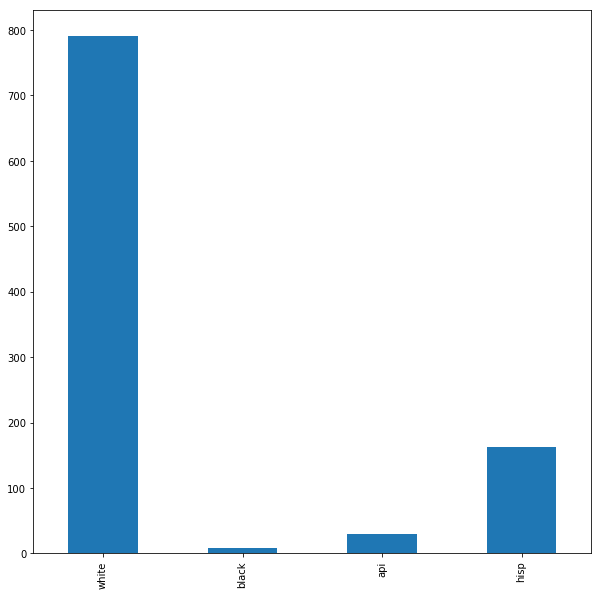

In [73]:
majority.plot(kind='bar', legend=False, figsize=(10,10))
pyplot.show()

In [74]:
majority['size'].sum()     # number of names reprsented (from top 1000) in graph above

991